In [1]:
import pandas as pd
from collections import Counter
from nltk.util import ngrams
from itertools import tee, islice

df = pd.read_csv('word_complete.csv')

df_list = df.values.tolist()

df_list[0][0]

def ngrams(lst, n):
    tlst = lst
    while True:
        a, b = tee(tlst)
        l = tuple(islice(a,n))
        if len(l) == n:
            yield l
            next(b)
            tlst = b
        else:
            break
    return tlst

counters = []
for index, row in df.iterrows():
    keyword_list = str(row.keyword).split(' ')
    counters.append(Counter(ngrams(keyword_list, 2))) # ngrams 두개씩 묶어서 카운트

counts = sum(counters, Counter())

result = []
for i in counts.most_common():
    row = list(i)
    data = list(i[0]) + [row[1]]
    result.append(data)

data_frame = pd.DataFrame(result, columns=['word1', 'word2', 'feq'])

data_frame.to_csv('n-gram.csv', encoding='utf-8-sig')

In [2]:
counts.most_common(20)

[(('온라인', '커뮤니티'), 200),
 (('사회적', '거리'), 79),
 (('유튜브', '튜브'), 58),
 (('배달', '배달음식'), 46),
 (('거리', '기가'), 45),
 (('신종', '코로나'), 44),
 (('코로나', '확산'), 43),
 (('코로나', '감염증'), 42),
 (('관광', '공사'), 40),
 (('스타', '그램'), 38),
 (('인스타그램', '스타'), 36),
 (('취재', '본부'), 35),
 (('배달', '주문'), 35),
 (('일상', '회복'), 32),
 (('배달기사', '기사'), 31),
 (('거리', '해제'), 30),
 (('보배', '보배드림'), 30),
 (('보배드림', '드림'), 30),
 (('용산', '용산구'), 30),
 (('송파', '송파구'), 30)]

In [3]:
df=pd.read_csv('n-gram.csv')
df = df.iloc[:300]

In [4]:
result1=[]
key=['배달', '코로나', '트렌드', '온라인', '치킨', '가게'] # 특정 키워드로 노드그리기
for row in df.itertuples(index=False):
    if row.word1 in key or row.word2 in key:
        result1.append([row.word1,row.word2])
result1=pd.DataFrame(result1,columns=['word1','word2'])

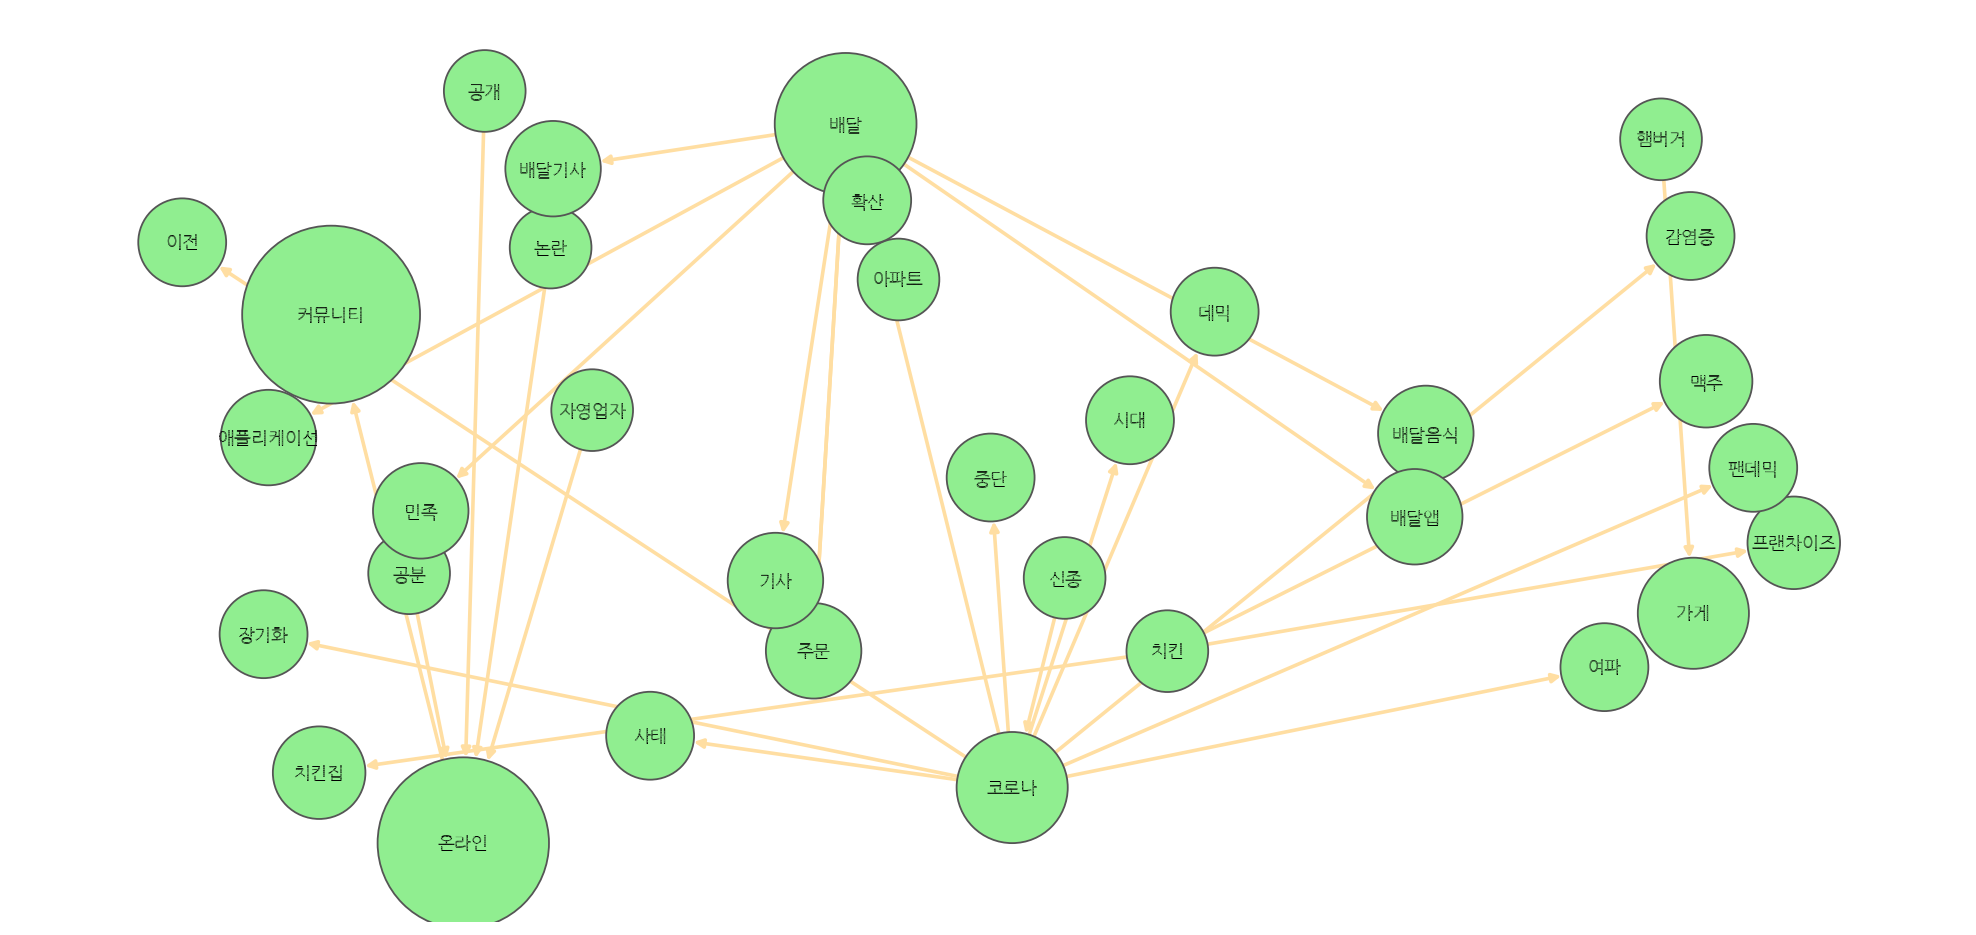

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np 
import matplotlib.font_manager as fm

uniqueword = result1.word1.unique()
result2=[]
for row in result1.itertuples(index=False):
    result2.append((row.word1,row.word2))

a=nx.DiGraph()

node = uniqueword
a.add_nodes_from(node)

a.add_edges_from (result2)
i = 0

font_location='C:\\Users\\kimsdata\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicEco.ttf' # 폰트 없을시 한글깨짐
fontprop=fm.FontProperties(fname=font_location,size=30).get_name()

pg=nx.pagerank(a,max_iter=100)

pos=nx.spring_layout(a)

#좌표를 양의 좌표로 수정
for node in a.nodes:
    pos[node]=[pos[node][0]+1000,pos[node][1]+1000]

#노드간 거리확인 
for x in range(20):
    for nodex in a.nodes:
      for nodey in a.nodes:
          if(nodex != nodey):
              # if y distance is too small
              if(max(pos[nodex][1],pos[nodey][1])-min(pos[nodex][1],pos[nodey][1]) <0.6):
                  # check if also x distance is too small
                  if((max(pos[nodex][0],pos[nodey][0])-min(pos[nodex][0],pos[nodey][0])<0.3)):
                      #print(nodex,nodey)
                      if(pos[nodex][1] < pos[nodey][1]):
                          pos[nodex][1] = pos[nodex][1]-0.6
                          pos[nodey][1] = pos[nodey][1]+0.6
                      else:
                          pos[nodex][1] = pos[nodex][1]+0.6
                          pos[nodey][1] = pos[nodey][1]-0.6


plt.figure(figsize=(15,7), dpi=130, facecolor='w')
nx.draw(a,pos=pos,node_color='lightgreen', node_size=[v * 100000 for v in pg.values()] # 노드사이즈 조정
        ,with_labels = True, font_family=fontprop, edge_cmap=plt.cm.Blues, font_size=10, width=2, font_weight='regular', edge_color='#FFDEA2')
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
plt.show()